In [2]:
import gc
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import euclidean_distances

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/GonieAhn/Data-Science-online-course-from-gonie/main/Data%20Store/example_data.csv")

In [4]:
data.head()

,censor,event,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,cd40,cd420,cd496,r,cd80,cd820
0,0,1090,43,66.679,0,1,0,100,0,1,...,1,1,3,0,504,353,660,1,870,782
1,1,794,31,73.030,0,1,0,100,0,1,...,1,1,3,0,244,225,106,1,708,699
2,0,957,41,66.226,0,1,1,100,0,1,...,1,1,3,0,401,366,453,1,889,720
3,1,188,35,78.019,0,1,0,100,0,1,...,1,1,3,0,221,132,-1,0,221,759
4,1,308,40,83.009,0,1,0,100,0,1,...,1,1,3,1,150,90,20,1,1730,1160


In [7]:
Y = data['censor']
X = data.drop(columns=['censor'])

In [8]:
data.columns

Index(['censor', 'event', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'zprior', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'cd40', 'cd420', 'cd496', 'r', 'cd80', 'cd820'],
      dtype='object')

In [9]:
data['cd820'].unique()

array([ 782,  699,  720,  759, 1160,  990, 1000, 2265, 1698, 1017,  710,
       1780,  490, 1220, 1590, 1020,  420,  690,  850,  640, 1034,  590,
        847, 1191, 1287, 1070, 1143, 1125,  784, 1573,  799, 1415, 1338,
        440,  943,  967, 1909, 1905, 1282, 1131,  749,  611, 1558, 1488,
        823,  765,  528,  642, 1170,  545,  816, 1186,  449,  454,  460,
        786,  678, 1295,  612,  958, 1654, 1109, 2056,  920,  813,  945,
       1437,  602, 1482, 1054, 1126, 1176,  776,  567,  748,  950,  622,
        346,  740, 1313,  500, 1491,  858,  585, 1442,  353,  664,  391,
        637,  570,  673, 1140,  828, 1084, 1093, 1290,  566,  954, 1686,
       1406, 1375,  416, 1351, 1831,  936,  513,  739, 1179,  889,  938,
        846,  728,  792,  737,  627,  756, 1280,  583,  432, 1496, 1544,
       1197,  468,  741,  812,  603,  873,  867,  708, 1048,  396,  369,
        886,  621,  779, 1041,  318, 1007, 1162, 1130,  560, 1318, 1018,
        669,  899,  613, 1296, 1418, 1700,  620,  6

<Axes: >

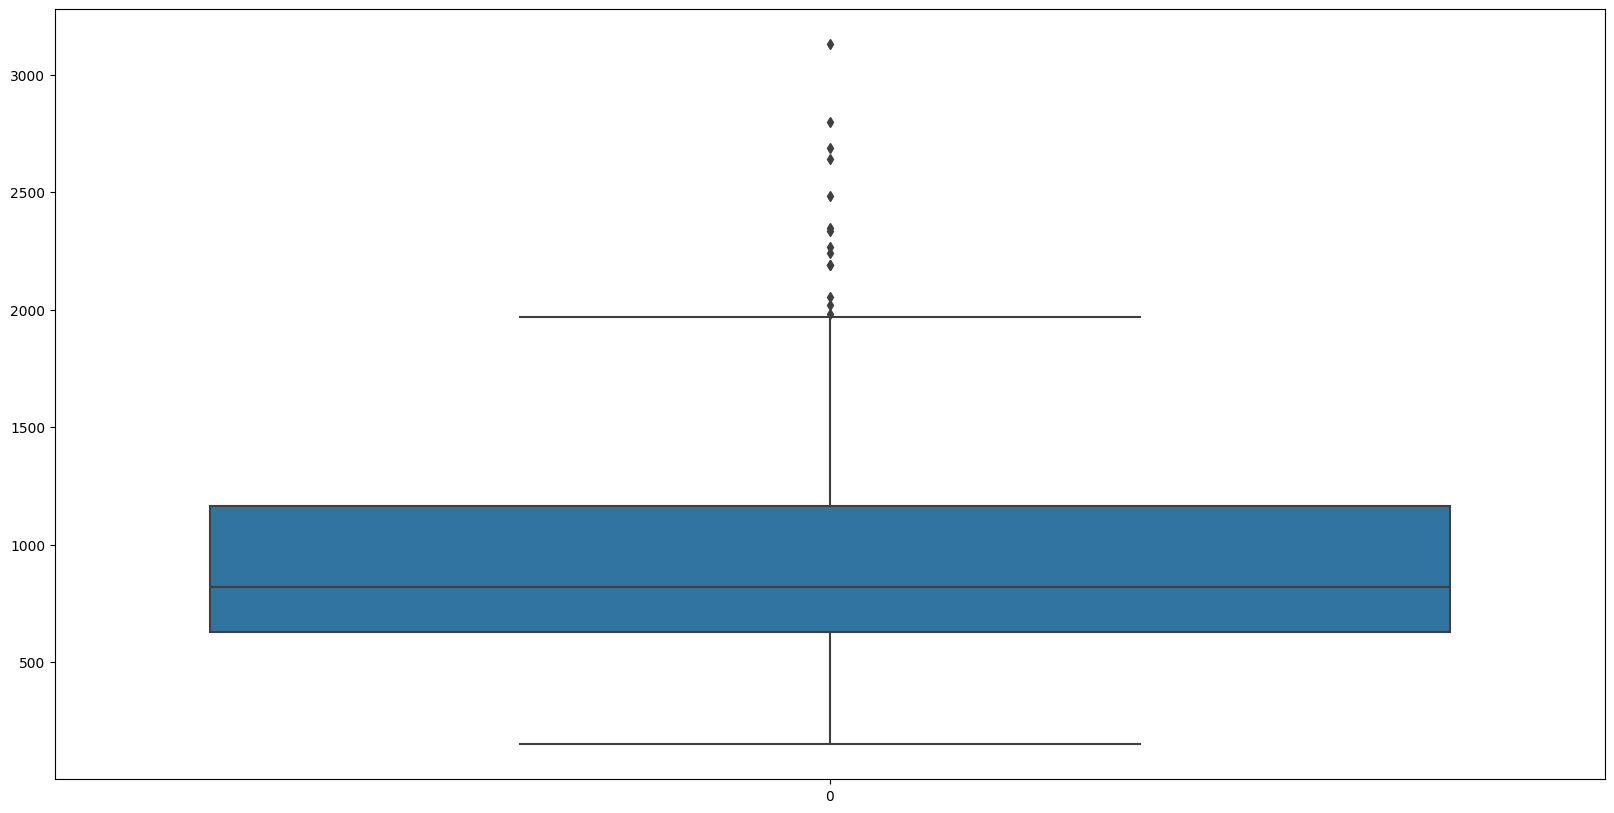

In [10]:
plt.figure(figsize=(20,10))
sns.boxplot(data['cd820'])

In [11]:
data['cd80'][data['cd80'].argsort()[::-1]]

480    4255
444    3190
515    3046
481    2840
356    2739
       ... 
256     337
506     333
516     324
488     225
3       221
Name: cd80, Length: 532, dtype: int64

In [12]:
data = data.drop(index=data['cd80'][data['cd80'].argsort()[::-1]][0:1].index)

In [13]:
data = data.drop(columns=['zprior', 'drugs'],)

In [14]:
data.reset_index(drop=True, inplace=True)

In [15]:
data

,censor,event,age,wtkg,hemo,homo,karnof,oprior,z30,preanti,...,gender,str2,strat,symptom,cd40,cd420,cd496,r,cd80,cd820
0,0,1090,43,66.679,0,1,100,0,1,1352,...,1,1,3,0,504,353,660,1,870,782
1,1,794,31,73.030,0,1,100,0,1,930,...,1,1,3,0,244,225,106,1,708,699
2,0,957,41,66.226,0,1,100,0,1,1329,...,1,1,3,0,401,366,453,1,889,720
3,1,188,35,78.019,0,1,100,0,1,964,...,1,1,3,0,221,132,-1,0,221,759
4,1,308,40,83.009,0,1,100,0,1,974,...,1,1,3,1,150,90,20,1,1730,1160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0,1097,24,71.000,1,0,100,0,1,334,...,1,1,2,0,364,475,734,1,770,802
527,1,154,21,52.300,1,0,90,0,1,24,...,1,1,2,0,415,181,84,1,949,666
528,1,588,16,63.000,1,0,100,0,1,753,...,1,1,3,0,299,214,124,1,546,471
529,0,395,17,102.967,1,0,100,0,1,417,...,1,1,3,0,373,218,-1,0,1759,1030


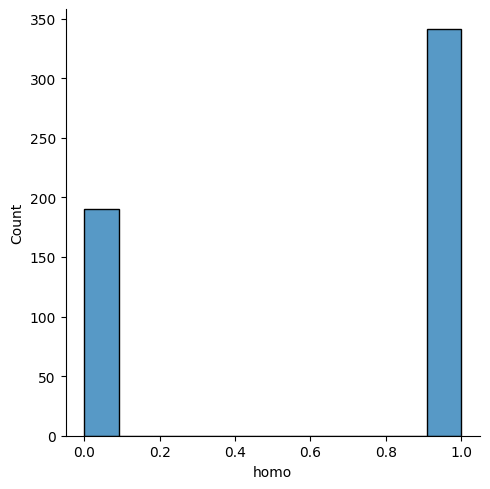

In [16]:
sns.displot(data['homo'])

In [18]:
scaler = MinMaxScaler().fit(X)
X_scal = scaler.transform(X)
X_scal = pd.DataFrame(X_scal, columns=X.columns)

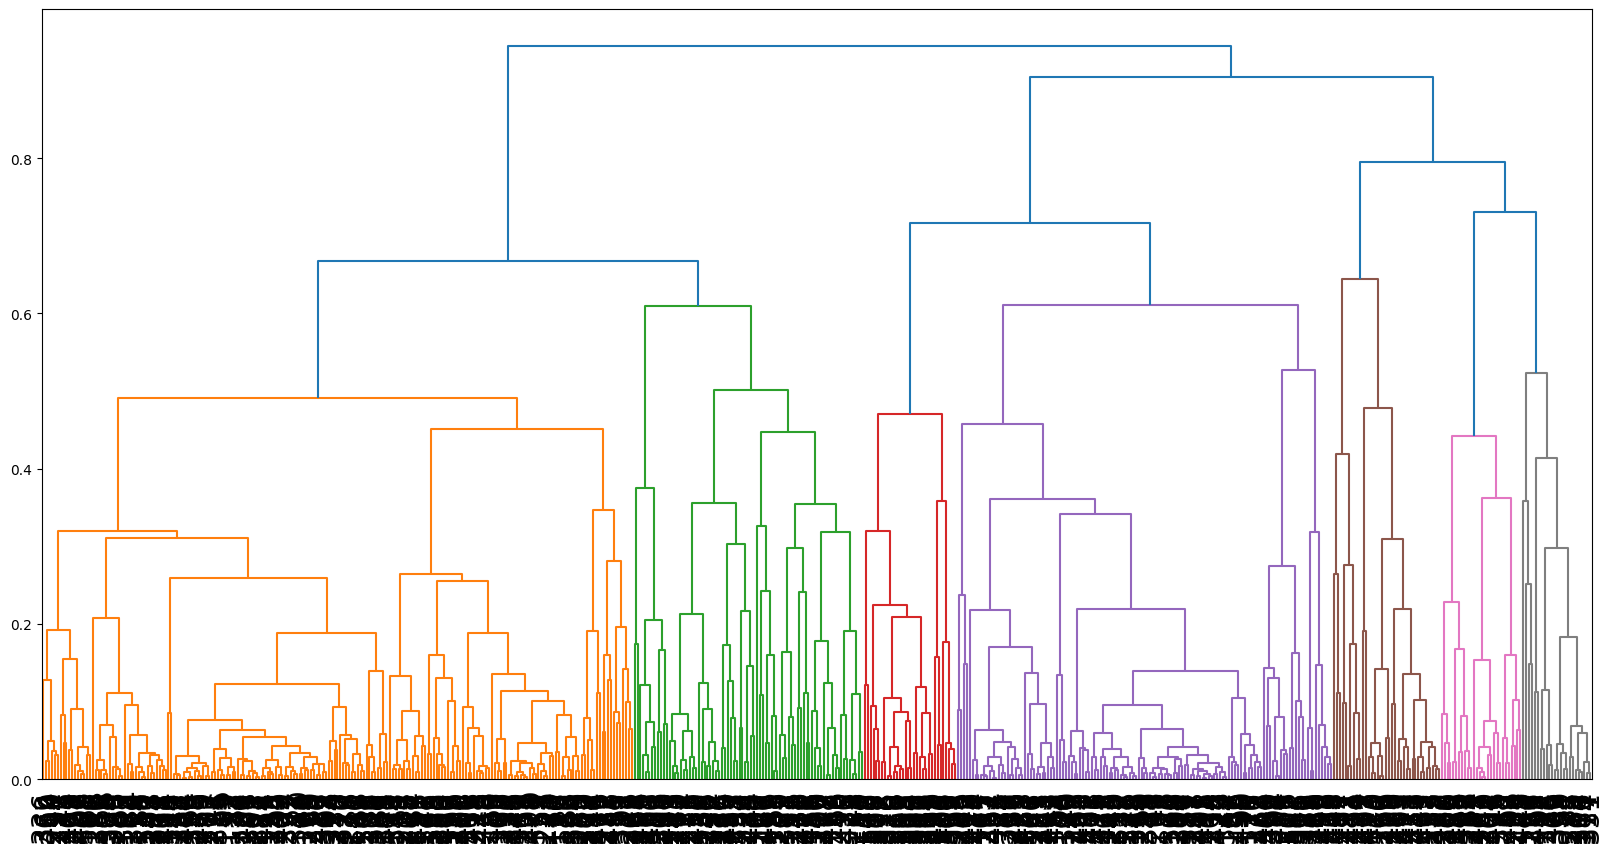

In [27]:
meth = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']
metric = ['euclidean', 'cosine']
HC = linkage(X_scal,method=meth[1], metric=metric[1])
plt.figure(figsize=(20,10))
dendrogram(HC,
            leaf_rotation=90,
            leaf_font_size=20)
plt.show()

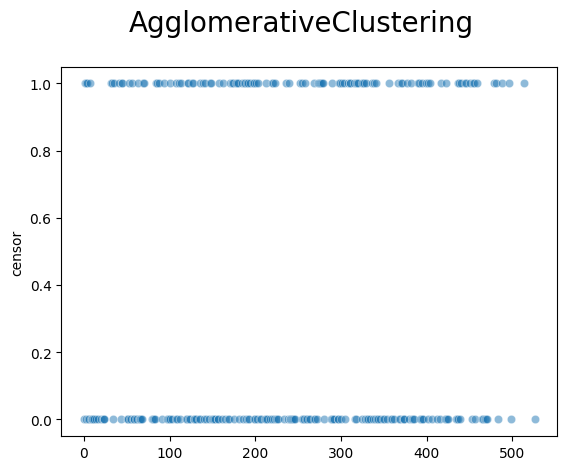

In [80]:
model = AgglomerativeClustering(
        n_clusters=2, linkage=meth[1], metric=metric[1]
    )
model.fit(X_scal)
plt.figure()
sns.scatterplot(Y[model.labels_ == model.n_clusters-1],  alpha=0.5)
plt.axis("tight")
# plt.axis("off")
plt.suptitle("AgglomerativeClustering", size=20, y=1)
plt.show()